<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8m/s$ la aceleración de la gravedad  y  $\gamma$ la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

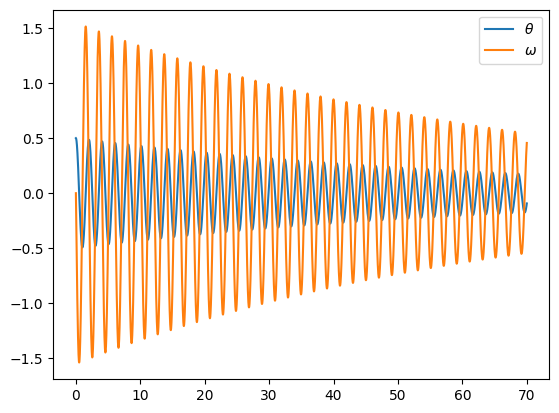

In [2]:
#Usando el método de euler

import numpy as np
import matplotlib.pyplot as plt

theta0=0.5 #Angulo inicial del péndulo en radianes
w0=0 #Velocidad inicial del péndulo en grados

dt = 0.01 #Intervalo de tiempo
tM = 70 #Valor máximo de tiempo

L = 1
gamma=0.03
g=9.8


theta = [theta0]
w = [w0]
t=[0]

while t[-1] <= tM:
    w.append(w[-1] -dt*((g/L)*np.sin(theta[-1])+gamma*L*w[-1]))
    theta.append(theta[-1]+dt*w[-1])
    t.append(t[-1]+dt)
plt.plot(t, theta, label="$\\theta$")
plt.plot(t, w, label="$\omega$")
plt.legend()

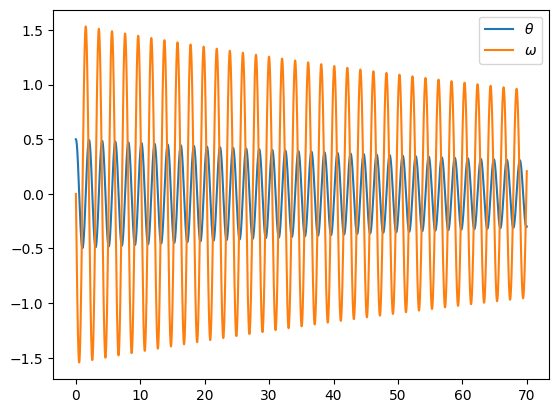

In [3]:
#Método Runge-Kutta


theta = [theta0]
w = [w0]
t=[0]
dt = 0.01
tM = 70
g = 9.8

while t[-1] <= tM:
    f = lambda theta, w: -(g/L)*np.sin(theta)-gamma*L*w
    k0 = dt*w[-1]
    l0 = dt*f(theta[-1], w[-1])
    k1 = dt*(w[-1]+0.5*l0)
    l1 = dt*f(theta[-1]+0.5*k0, w[-1]+0.5*l0)
    k2 = dt*(w[-1]+0.5*l1)
    l2 = dt*f(theta[-1]+0.5*k1, w[-1]+0.5*l1)
    k3 = dt*(w[-1]+0.5*l2)
    l3 = dt*f(theta[-1]+0.5*k2, w[-1]+0.5*l2)
    theta.append(theta[-1]+(1/6)*(k0+2*k1+2*k2+k3))
    w.append(w[-1]+(1/6)*(l0+2*l1+2*l3+l3))
    t.append(t[-1]+dt)

plt.plot(t, theta, label="$\\theta$")
plt.plot(t, w, label="$\omega$")
plt.legend()


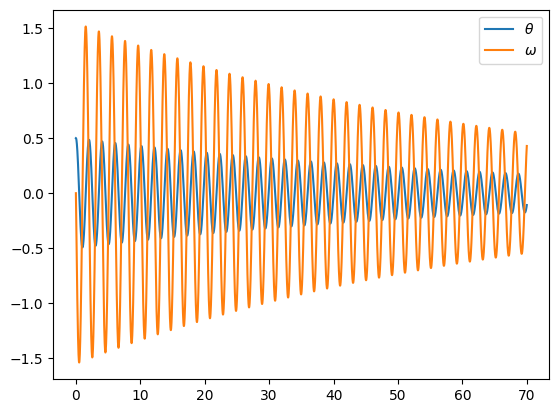

In [4]:
#Corroboración con odeint
from scipy.integrate import odeint

solvr = lambda X,t: [X[1], -(g/L)*np.sin(X[0])-gamma*L*X[1]]
t = np.arange(0, 70, 0.01)

Y = np.array(odeint(solvr, [0.5, 0], t))

plt.plot(t, Y, label=["$\\theta$", "$\omega$"])
plt.legend()


In [5]:
#Corroborando con la solución teórica


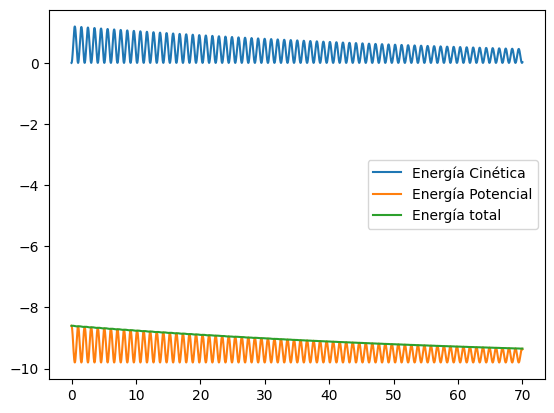

In [6]:
#términos para energía:

theta = [theta0]
w = [w0]
t=[0]
dt = 0.01
tM = 70
g = 9.8

while t[-1] <= tM:
    f = lambda theta, w: -(g/L)*np.sin(theta)-gamma*L*w
    k0 = dt*w[-1]
    l0 = dt*f(theta[-1], w[-1])
    k1 = dt*(w[-1]+0.5*l0)
    l1 = dt*f(theta[-1]+0.5*k0, w[-1]+0.5*l0)
    k2 = dt*(w[-1]+0.5*l1)
    l2 = dt*f(theta[-1]+0.5*k1, w[-1]+0.5*l1)
    k3 = dt*(w[-1]+0.5*l2)
    l3 = dt*f(theta[-1]+0.5*k2, w[-1]+0.5*l2)
    theta.append(theta[-1]+(1/6)*(k0+2*k1+2*k2+k3))
    w.append(w[-1]+(1/6)*(l0+2*l1+2*l3+l3))
    t.append(t[-1]+dt)

w = np.array(w)

T = lambda w: 0.5*(L*w)**2 #Energía cinética
U = lambda theta: -np.cos(theta)*g #Energía potencial
plt.plot(t, T(w), label="Energía Cinética")
plt.plot(t, U(theta), label="Energía Potencial")
plt.plot(t, T(w)+U(theta), label="Energía total")
plt.legend()

# Preguntas
1. Entre menor $\Delta t$, más precisa será la simulación
2. Si $\theta_0$ no es pequeño, la aproximación de ángulo pequeño $\sin(\theta)\approx \theta$ deja de ser válida.
3. El tipo del movimiento del péndulo no cambia apreciablemente con respecto a $\theta_0$ o $L$.
4. La energía no se conserva, esto es debido a la fricción, la cual no es una fuerza conservativa
5. En este caso, no encuentro ninguna diferencia

In [8]:
#Creando animación
from IPython.display import HTML
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np


plt.ioff()
fig = plt.figure()
camera = Camera(fig)

theta = [theta0]
w = [w0]
t=[0]
dt = 0.05
tM = 4
g = 9.8

while t[-1] <= tM:
    f = lambda theta, w: -(g/L)*np.sin(theta)-gamma*L*w
    k0 = dt*w[-1]
    l0 = dt*f(theta[-1], w[-1])
    k1 = dt*(w[-1]+0.5*l0)
    l1 = dt*f(theta[-1]+0.5*k0, w[-1]+0.5*l0)
    k2 = dt*(w[-1]+0.5*l1)
    l2 = dt*f(theta[-1]+0.5*k1, w[-1]+0.5*l1)
    k3 = dt*(w[-1]+0.5*l2)
    l3 = dt*f(theta[-1]+0.5*k2, w[-1]+0.5*l2)
    theta.append(theta[-1]+(1/6)*(k0+2*k1+2*k2+k3))
    w.append(w[-1]+(1/6)*(l0+2*l1+2*l3+l3))
    t.append(t[-1]+dt)

for i in range(len(t)):
    plt.scatter(np.sin(theta[i]), -np.cos(theta[i]), color="Blue")
    plt.plot([0, np.sin(theta[i])], [0, -np.cos(theta[i])], color="Grey")
    camera.snap()



plt.close()
animation = camera.animate()
animation.save('animación_péndulo.mp4', fps=50)
HTML(animation.to_html5_video())
